# Projeto 2

### Análise exploratória de Dados em Linguagem Python para área de Varejo

In [ ]:
# Importanções
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Carregando os dados

In [3]:
df = pd.read_csv('dataset.csv')
#df = pd.read_excel('Sample_Superstore.xls')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

### Análise Exploratória

In [ ]:
# Colunas do conjunto de dados
df.columns

In [ ]:
# Verificando o tipo de dados de cada coluna
df.dtypes

In [ ]:
# Resumo estatŕistico da coluna com o valor de Venda
df['Valor_Venda'].describe()

In [ ]:
# Verificando se há registros duplicados
df[df.duplicated()]

In [ ]:
# Verificando se ha valores ausentes
df.isnull().sum()

In [ ]:
df.head()

# Pergunta 1
### Qual cidade com maior valor de Venda de Produtos da Categoria "Office Supplies"?

In [ ]:
filtro = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()

In [ ]:
filtro

# Pergunta 2

Qual o total de vendas por Data do Pedido

In [ ]:
total_pedido = df.groupby('Data_Pedido')['Valor_Venda'].sum()
total_pedido.head()

In [ ]:
#plotando
plt.figure(figsize = (20, 6))
total_pedido.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas por Data pedido')
plt.show()

# Pergunta 3
Qual o total de vendas por estado

In [ ]:
total_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
total_estado.head()


In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data = total_estado, x = 'Estado', y = 'Valor_Venda').set(title = 'Vendas por Estado')

plt.xticks(rotation = 80)
plt.show()

## Pergunta 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [ ]:
df.head()

In [ ]:
# Agrupamos por cidade, calcujlamos o total de vendas e ordenamos listando somente os 10 primeiros registros
maior_total = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending=False).head(10)

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=maior_total, x = 'Cidade', y = 'Valor_Venda').set(title = 'top 10 cidades em vendas')
plt.xticks = 80
plt.show()

## Pergunta de 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [ ]:
total_segmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending=False)
total_segmento.head()

In [8]:
# Função para converter os dados em valor absoluto
def autopct_format(value):
    def my_format(pct):
        total = sum(value)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

In [ ]:
plt.figure(figsize=(16, 6))
plt.pie(total_segmento['Valor_Venda'], 
        labels=total_segmento['Segmento'], 
        autopct=autopct_format(total_segmento['Valor_Venda']), startangle=90)

# Limpa Circulo central
ciculo_central = plt.Circle((0,0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(ciculo_central)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(total_segmento['Valor_Venda']))), xy = (-0.35 , 0))
plt.title('Vendas por segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [ ]:
# Convertemosm a coluna de dados para o time datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst= True)
df.dtypes
df.head()
df['Ano'] = df['Data_Pedido'].dt.year
df.head()

In [ ]:
segmento_ano = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
segmento_ano

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [ ]:
# cria uma nova coluna de acordo com a regra definica acima
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

In [ ]:
df.head()

In [ ]:
# Total por cada valor da variável
df['Desconto'].value_counts()

## Pergunta  8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [ ]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])
df.head()

In [ ]:
# Filtando as vendas antes do desconto de 15%
antes_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']

In [ ]:
# Filtrando as vendas depois do desconto de 15%
depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [ ]:
media_antes_desconto = antes_desconto.mean()
media_depois_desconto = depois_desconto.mean()

In [ ]:
print("Media das vendas antes do desconto de 15%: ", round(media_antes_desconto, 2))
print("\nMedia das vendas depois do desconto de 15%: ", round(media_depois_desconto, 2))

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [ ]:
df['Mes_Pedido'] = df['Data_Pedido'].dt.month
df.head()

In [ ]:
mes_pedido = df.groupby(['Ano', 'Mes_Pedido', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
mes_pedido

In [ ]:
# Vamos Extrair os níveis
anos = mes_pedido.index.get_level_values(0)
meses = mes_pedido.index.get_level_values(1)
segmentos = mes_pedido.index.get_level_values(2)

https://seaborn.pydata.org/generated/seaboarn.relplot.html

In [ ]:
#plot
plt.figure(figsize=(12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = mes_pedido,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap=4)
fig2 = sns.relplot(kind = 'line',
                   data = mes_pedido,
                   y = 'sum',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap=4)
fig3 = sns.relplot(kind = 'line',
                   data = mes_pedido,
                   y = 'median',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap=4)
plt.show

## Pergunta  10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [4]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para as variaveis numericas
vendas_categoria_sub = df.groupby(['Categoria',
                                   'SubCategoria']).sum(numeric_only= True).sort_values('Valor_Venda', ascending=False).head(12)
vendas_categoria_sub

Valor_Venda
Categoria       SubCategoria             
Technology      Phones        325271.2940
Furniture       Chairs        317919.6250
Office Supplies Storage       216188.3620
Furniture       Tables        202083.3600
Office Supplies Binders       194723.3810
Technology      Machines      189238.6310
                Accessories   162791.3620
                Copiers       146248.0940
Furniture       Bookcases     108045.0467
Office Supplies Appliances    104061.6930
Furniture       Furnishings    88862.7700
Office Supplies Paper          76312.7640

In [5]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por cagegoria
vendas_categoria_sub = vendas_categoria_sub[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()
vendas_categoria_sub

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [7]:
# Criamos outro datafreame somente para os totais por categoria
total_cat = vendas_categoria_sub.groupby('Categoria').sum(numeric_only=True).reset_index()
total_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [10]:
# Lista de Cores para as Categorias
cores_categorias = ['#5d00de', '#0ee84f', '#e80e27']

In [11]:
# Lista de Cores para as subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

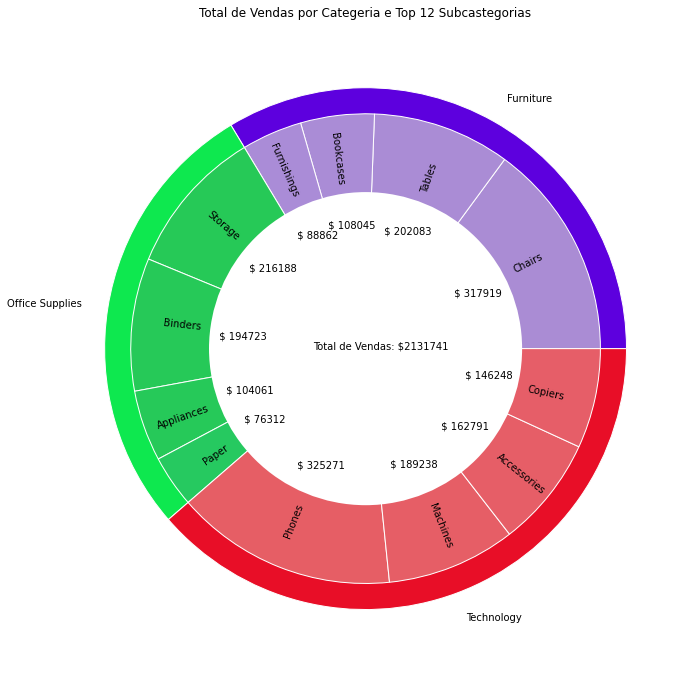

In [16]:
# plot
# Tamanho da figura
fig, ax = plt.subplots(figsize = (18, 12))

# Grafico das categorias
p1 = ax.pie(total_cat['Valor_Venda'],
            radius = 1,
            labels = total_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Grafico das subcategorias
p2 = ax.pie(vendas_categoria_sub['Valor_Venda'],
            radius = 0.9,
            labels = vendas_categoria_sub['SubCategoria'],
            autopct = autopct_format(vendas_categoria_sub['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
center_circle = plt.Circle((0,0), 0.6, fc = 'White')

#labels e anotações
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.annotate(text = 'Total de Vendas: $' + str(int(sum(vendas_categoria_sub['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas por Categeria e Top 12 Subcastegorias')
plt.show()